In [77]:
from selenium import webdriver
import time
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Collect Data from DevPost

In [2]:
url = 'https://the-cuny-hackathon-2021.devpost.com/participants'
path = r'C:\Users\Hong\Desktop\chromedriver'

In [3]:
# Go on devpost and login

driver = webdriver.Chrome(executable_path = path)
driver.get(url)

driver.find_element_by_id('main-link').click()
driver.find_element_by_link_text('Log in with GitHub').click()

with open('github_pw.txt', 'r') as f:
    pw = f.read()
    
driver.find_element_by_id('login_field').send_keys('hon3g')
driver.find_element_by_id('password').send_keys(pw)
driver.find_element_by_xpath('//*[@id="login"]/div[3]/form/input[14]').click()

In [4]:
# Make a scroller function

def anti_lazy_loader(sec):
    start_time = time.time()
    seconds = sec

    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        
        current_time = time.time()
        elapsed_time = current_time - start_time
        if elapsed_time > seconds:
            print("Finished scrolling in: " + str(int(elapsed_time))  + " seconds")
            break
            
            
anti_lazy_loader(60)

Finished scrolling in: 60 seconds


In [5]:
# Get all participants' profile links, title, and team status

links = []
title = []
status = []

for i in range(500):
    # Get link
    e = driver.find_elements_by_xpath(f'//*[@id="participants"]/ul/div[{i}]/div[1]/div[2]/div/h5/a')
    if len(e) < 1:
        links.append(None)
    else:
        links.append(e[0].get_attribute('href'))
        
    # Get title
    e = driver.find_elements_by_xpath(f'//*[@id="participants"]/ul/div[{i}]/div[1]/div[2]/div/span[2]')
    if len(e) < 1:
        title.append('Unknown')
    else:
        title.append(e[0].text)
        
    # Get status
    e = driver.find_elements_by_xpath(f'//*[@id="participants"]/ul/div[{i}]/div[1]/div[3]/div/span')
    if len(e) < 1:
        status.append('Unknown')
    else:
        status.append(e[0].text)


In [6]:
# Remove failed links and their corresponding titles and statuses

for i in range(len(links) - 1, -1, -1):
    if links[i] is None:
        del links[i]
        del title[i]
        del status[i]

In [7]:
# Get the len and random sample 5 links
print(f'len: {len(links)}')
print(random.sample(links, 5))

# Get the len and random sample 5 titles
print(f'len: {len(title)}')
print(random.sample(title, 5))

# Get the len and random sample 5 statuses
print(f'len: {len(status)}')
print(random.sample(status, 5))

len: 490
['https://devpost.com/kelvin-wu125', 'https://devpost.com/mayravsanchez479', 'https://devpost.com/dhruvppatel2506', 'https://devpost.com/vilsijain-cse22', 'https://devpost.com/MajorLeagueHacking']
len: 490
['Unknown', 'Full-stack developer', 'Designer', 'Front-end developer', 'Unknown']
len: 490
['Has a team', 'Working solo', 'Working solo', 'Looking for teammates', 'Has a team']


In [8]:
# Time the fetching process
start = time.perf_counter()


# Create a hacker dictionary
hacker = {
    'name'         : [],
    'location'     : [],
    'country'      : [],
    'skills'       : [],
    'num_skills'   : [],
    'interests'    : [],
    'num_interests': [],
    'projects'     : [],
    'hackathon'    : [],
    'achievement'  : [],
    'followers'    : [],
    'following'    : [],
    'likes'        : [],
    
    'title'        : title,
    'status'       : status,
}


# Loop through each participant
for idx in range(len(links)):
    driver.get(links[idx])
    
    
    # Get name
    try:
        e = driver.find_elements_by_xpath('//*[@id="portfolio-user-name"]')[0]
        name = e.text[: e.text.index('(') - 1].title()

        hacker['name'].append(name)
    ## Someone keeps changing names?
    except IndexError:
        print(f'Failed at index {idx}')
        failed = idx
        continue
    
    
    # Get location
    try:
        e = driver.find_elements_by_xpath('//*[@id="portfolio-user-links"]/li[1]')[0]
        if e.text in {'GitHub', 'LinkedIn', 'Website'}:
            location = 'Unknown'
        else:
            location = e.text
    except IndexError:
        location = 'Unknown'
    hacker['location'].append(location)
    
    try:
        start = location.rindex(' ') + 1
        hacker['country'].append(location[start:])
    except ValueError:
        hacker['country'].append(location)
    
    
    # Get skills
    skills = []
    for i in range(999):
        try:
            e = driver.find_elements_by_xpath('//*[@id="portfolio-user-info"]/div/div/div[1]/ul/li')[i]
            skills.append(e.text)
        except IndexError:
            break
    hacker['skills'].append(skills)
    hacker['num_skills'].append(len(skills))
    
    
    # Get interests
    interests = []
    for i in range(999):
        try:
            e = driver.find_elements_by_xpath('//*[@id="portfolio-user-info"]/div/div/div[2]/ul/li')[i]
            interests.append(e.text)
        except IndexError:
            break
    hacker['interests'].append(interests)
    hacker['num_interests'].append(len(interests))
            
    
    # Get projects, hackathon, achievement, followers, following, and likes
    loc = 1
    for i in ('projects', 'hackathon', 'achievement', 'followers', 'following', 'likes'):
        e = driver.find_elements_by_xpath(f'//*[@id="portfolio-navigation"]/ul/li[{loc}]/a/div/span')[0]
        hacker[i].append(e.text)
        loc += 1



end = time.perf_counter()
mins = round((end - start) / 60,  1)
print(f'Finished fetching in: {mins} minutes!')

Finished fetching in: 10.4 minutes!


In [12]:
try:
    del title[failed]
    del status[failed]
except NameError:
    pass
    
for key in hacker.keys():
    print(key, len(hacker[key]))

name 490
location 490
country 490
skills 490
num_skills 490
interests 490
num_interests 490
projects 490
hackathon 490
achievement 490
followers 490
following 490
likes 490
title 490
status 490


# Data Preprocessing &  Visualization

In [362]:
# Convert hacker ditionary into a pandas dataframe
df = pd.DataFrame(hacker)

# Save a copy locally
df.to_csv('cuny_hackathon.csv', index=False)

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           490 non-null    object
 1   location       490 non-null    object
 2   country        490 non-null    object
 3   skills         490 non-null    object
 4   num_skills     490 non-null    int64 
 5   interests      490 non-null    object
 6   num_interests  490 non-null    int64 
 7   projects       490 non-null    object
 8   hackathon      490 non-null    object
 9   achievement    490 non-null    object
 10  followers      490 non-null    object
 11  following      490 non-null    object
 12  likes          490 non-null    object
 13  title          490 non-null    object
 14  status         490 non-null    object
dtypes: int64(2), object(13)
memory usage: 57.5+ KB


In [364]:
df.sample(5)

,name,location,country,skills,num_skills,interests,num_interests,projects,hackathon,achievement,followers,following,likes,title,status
107,Mena Bebawy,"New York, New York, United States",States,"[c++, css3, html5, sql, r]",5,[Machine Learning/ AI],1,0,2,1,0,0,0,Student,Looking for teammates
322,Marcus Dawodu,"New York, New York, United States",States,"[python, java, html, css, c++, photoshop]",6,"[AR/VR, Cybersecurity, Gaming, Machine Learnin...",4,0,1,1,1,1,0,Front-end developer,Has a team
325,Jennifer Ww,Unknown,Unknown,[java],1,"[AR/VR, Gaming, Machine Learning/ AI, Producti...",4,1,3,4,1,0,0,Product manager,Has a team
368,Caesar Chin,"New York, New York, United States",States,"[python, c++, brainf, javascript]",4,[Lifehacks],1,1,2,4,3,0,1,Unknown,Has a team
37,Nika Dariani,"Toronto, Ontario, Canada",Canada,"[photoshop, adobe-illustrator, adobe, adobe-xd...",10,"[Blockchain, Communication, Gaming, Lifehacks,...",7,1,2,3,0,0,0,Project Manager,Has a team


In [365]:
name_df = df.loc[:, 'name']
df.drop(columns=['name', 'location', 'skills', 'interests'], inplace=True)

In [366]:
name_df

0            Wengsing Wong
1          Edwin Samaniego
2           Aditya Panchal
3          Keshav Majithia
4        Ajithtech75 Ajith
              ...         
485            Myat Thu Ko
486    Alexandra Debartolo
487    Isabelle Montesinos
488           Dolma Sherpa
489           Harjit Liyal
Name: name, Length: 490, dtype: object

In [367]:
df.sample(5)

,country,num_skills,num_interests,projects,hackathon,achievement,followers,following,likes,title,status
397,US,1,5,0,1,1,0,0,0,Business,Working solo
366,Canada,5,4,2,3,7,1,0,3,Full-stack developer,Working solo
71,Canada,4,6,0,1,1,0,0,0,Software Developer,Has a team
102,States,10,4,0,1,1,1,1,0,Full-stack developer,Has a team
364,India,3,3,1,2,1,0,0,0,Front-end developer,Has a team


Text(0.5, 1.0, 'Missing Data')

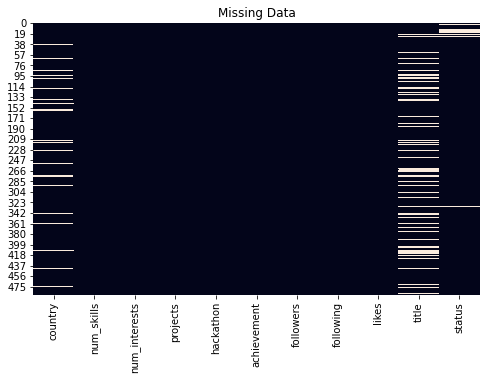

In [368]:
vdf = df.replace('Unknown', np.nan)

plt.figure(figsize=(8,5))
sns.heatmap(vdf.isnull(), cbar=False)
plt.title('Missing Data')

Text(0.5, 1.0, 'Missing Data')

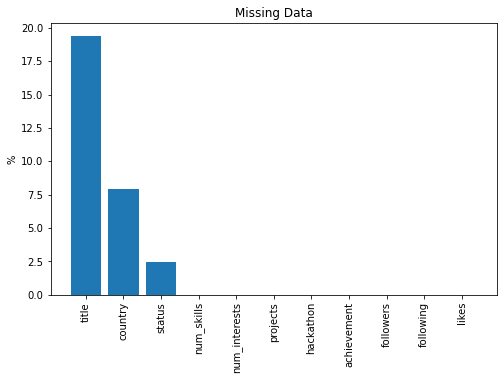

In [369]:
# Visualize the missing data by their sorted percentage

plt.figure(figsize=(8, 5))
missing = pd.DataFrame({'column':vdf.columns, 'na_percent':vdf.isnull().sum()/len(df)*100})
missing.sort_values('na_percent', ascending=False, inplace=True)
plt.bar(missing['column'], missing['na_percent'])
plt.ylabel('%')
plt.xticks(rotation=90)
plt.title('Missing Data')

In [370]:
unlabeled_df = df.loc[df['status'] == 'Unknown']
df.drop(df.loc[df['status'] == 'Unknown'].index, inplace=True)

In [371]:
df.loc[:, 'status'].replace({
    'Working solo': 0,
    'Looking for teammates': 1,
    'Has a team': 1,
},
    inplace=True
)

Text(0.5, 1.0, 'Solo: 0 \nTeam: 1')

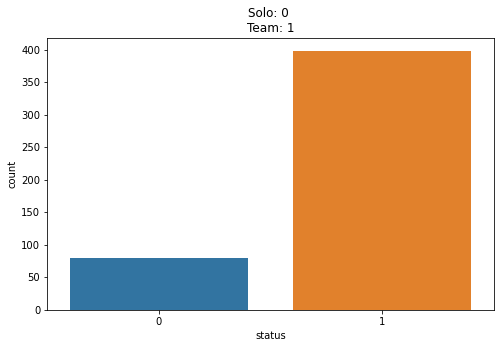

In [372]:
plt.figure(figsize=(8, 5))
sns.countplot(x='status', data=df)
plt.title('Solo: 0 \nTeam: 1')

In [373]:
df['title'].unique()

array(['Front-end developer', 'Full-stack developer', 'Product Designer',
       'Unknown', 'Mobile developer', 'Data scientist',
       'Software Engineer', 'student', 'Business', 'Engineer',
       'Back-end developer', 'Project Manager', 'software development',
       'Designer', 'Student', 'Software Developer', 'Product manager',
       'helper', 'Still-Learning', 'None/Still learning.', 'Game Dev',
       'UX', 'Data Analyst', 'Beginner', 'Cisco Networking',
       'High school student', 'None', 'Java', 'none', 'Coder',
       'youth worker', 'Beginner level developer', 'programmer',
       'Data Science Graduate Student', 'N/A', 'Programmer',
       'Undergraduate Student', 'Software Engineer Intern',
       'Graphic Designer', 'Student Developer', 'Art Industry'],
      dtype=object)

In [374]:
df.drop('title', axis=1, inplace=True)

In [375]:
df['country'].unique()

array(['States', 'Indonesia', 'India', 'IN', 'Canada', 'France', 'US',
       'Unknown', 'Romania', 'CA', '中国', 'Malaysia', 'CZ', 'DZ', 'Mexico',
       'Nam', 'BR', 'Kingdom'], dtype=object)

In [376]:
df['country'].replace({
    '中国': 'China',
    'States': 'US',
    'CA': 'Canada',
    'IN': 'India',
    'CZ': 'Czechia',
    'DZ': 'Algeria',
    'BR': 'Brazil',
    'Nam': 'Vietnam',
    'Kingdom': 'UK',
}, 
    inplace=True
)

df['country'].unique()

array(['US', 'Indonesia', 'India', 'Canada', 'France', 'Unknown',
       'Romania', 'China', 'Malaysia', 'Czechia', 'Algeria', 'Mexico',
       'Vietnam', 'Brazil', 'UK'], dtype=object)

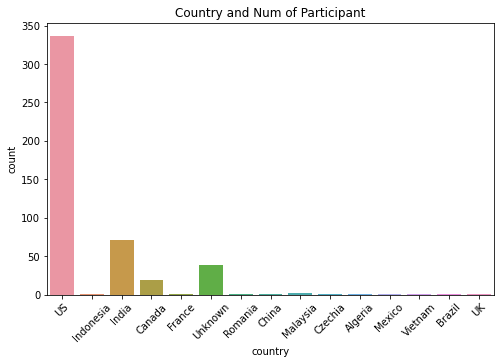

In [377]:
plt.figure(figsize=(8, 5))
sns.countplot(x='country', data=df)
plt.xticks(rotation=45)
plt.title('Country and Num of Participant')
plt.show()

In [378]:
obj_cols = ['projects', 'hackathon', 'achievement', 'followers', 'following', 'likes']

for col in obj_cols:
    df.loc[:, col] = df.loc[:, col].astype(int)

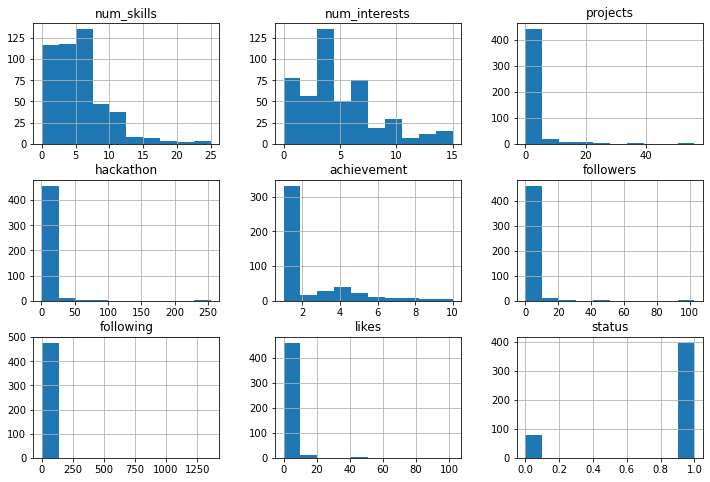

In [379]:
df.hist(grid=True, figsize=(12,8))
plt.show()

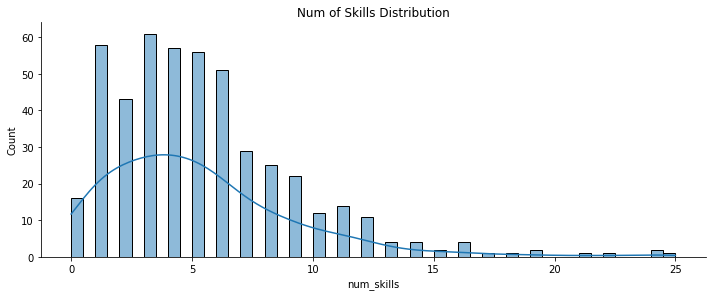

In [380]:
fg = sns.displot(x='num_skills', data=df, bins=50, kde=True,
                 height=4, aspect=2.5)

fg.set(title='Num of Skills Distribution')

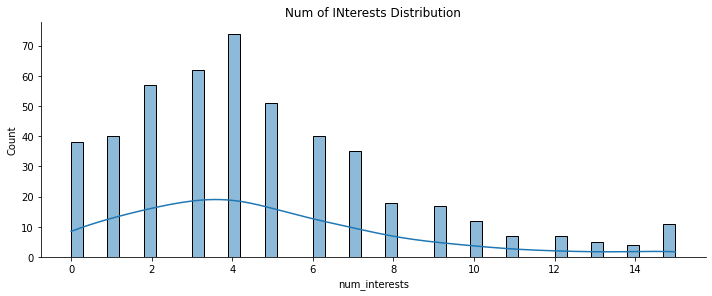

In [381]:
fg = sns.displot(x='num_interests', data=df, bins=50, kde=True,
                 height=4, aspect=2.5)

fg.set(title='Num of INterests Distribution')

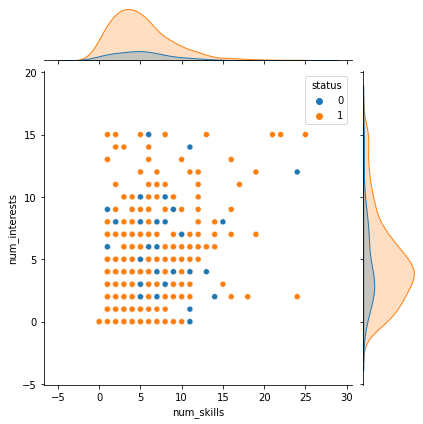

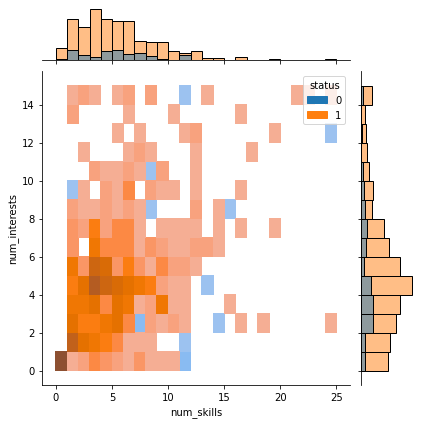

In [382]:
sns.jointplot(x='num_skills', y='num_interests', hue='status', data=df)
plt.show()
sns.jointplot(x='num_skills', y='num_interests', hue='status', data=df, kind='hist')
plt.show()

<AxesSubplot:>

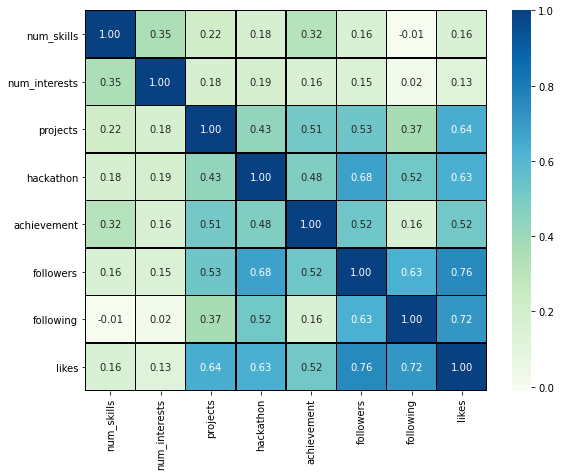

In [383]:
f,ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df[numerical_columns].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="GnBu")

In [384]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]], palette="Wistia",ax=ax[i][j])
            count = count+1

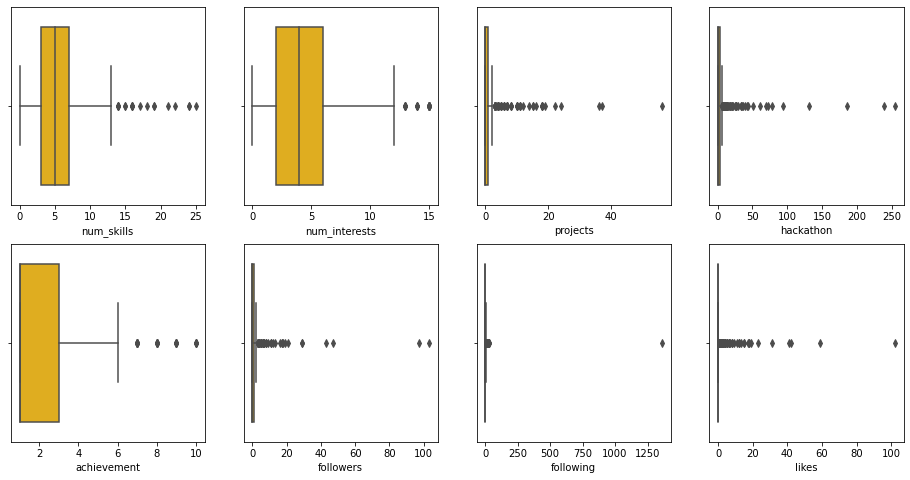

In [385]:
numerical_columns = df.iloc[:, 1:9].columns
boxplot_for_outlier(df, numerical_columns)

In [386]:
df['following'].unique()

array([   6,    0,    9,   14,    1,   30,    4,    2,    3,    5,   11,
         13,    7,   16,   10,   22,    8,   28,   15,   24,   18, 1360])

In [387]:
df.loc[df['following'] == 1360]

,country,num_skills,num_interests,projects,hackathon,achievement,followers,following,likes,status
406,Brazil,3,5,37,238,8,103,1360,102,1


In [388]:
print(f'{name_df.iloc[406]} is a super outlier in CUNY hackathon')

Jose Alexandro Acha Gomes is a super outlier in CUNY hackathon


In [389]:
df.drop(index=406,  inplace=True)

In [390]:
df['followers'].unique()

array([ 4,  0, 17, 11,  3, 16,  1, 13,  9,  2,  5,  7, 29,  8,  6, 47, 12,
       19, 43, 18, 21, 97])

In [391]:
df.loc[df['followers'] == 97]

,country,num_skills,num_interests,projects,hackathon,achievement,followers,following,likes,status
403,India,8,9,18,78,10,97,18,18,1


In [392]:
df.drop(index=403,  inplace=True)

In [393]:
df['hackathon'].unique()

array([  2,   1,  19, 186,   7,  21,   4,   6,  12,  42,   9,   5,  11,
         3,   8, 254,  13,  27,  43,  18,  29,  10,  39,  26,  14,  51,
        37,  35,  72, 131,  61,  33,  22,  94,  17,  69,  25,  15])

In [394]:
df.loc[(df['hackathon'] == 254) | 
       (df['hackathon'] == 186) | 
       (df['hackathon'] == 131) |
       (df['hackathon'] == 94)]

,country,num_skills,num_interests,projects,hackathon,achievement,followers,following,likes,status
6,India,11,6,6,186,9,11,14,42,0
140,Romania,11,14,11,254,8,29,3,6,0
343,Unknown,16,9,0,131,8,43,4,15,1
391,India,0,0,0,94,1,1,0,0,0


In [395]:
df.drop(index=[6, 140, 343, 391],  inplace=True)

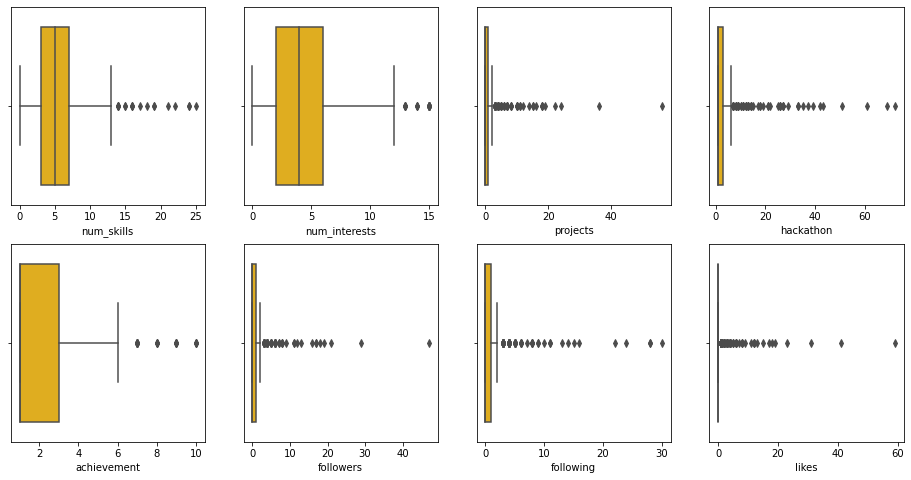

In [396]:
boxplot_for_outlier(df, numerical_columns)

In [399]:
raw = df

In [402]:
# Convert categorical variable into dummy/indicator variables

obj_cols = df.select_dtypes('object').columns

for col in obj_cols:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col])], axis=1)

# Build and Evaluate Models

In [532]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

import eli5
import lightgbm as lgb

In [507]:
# Create X (all columns except target)
X = df.drop('status', axis=1)

# Create y (only the target column)
y = df.loc[:, 'status']


# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

X_tst = X_test.copy()
# Create an instance of StandardScaler as scaler
scaler = StandardScaler()
# Fit the StandardScaler to the features
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [463]:
%%time
ML_models = {}
model_index = ['LR','RF','NN']
model_sklearn = [LogisticRegression(solver='liblinear', random_state=0),
                 RandomForestClassifier(n_estimators=100, random_state=0),
                 MLPClassifier([100]*5, early_stopping=True, learning_rate='adaptive', random_state=0)]
model_summary = []
for name,model in zip(model_index,model_sklearn):
    ML_models[name] = model.fit(X_train, y_train)
    preds = model.predict(X_test)
    model_summary.append([name,f1_score(y_test,preds, average='weighted'), accuracy_score(y_test,preds),
                          roc_auc_score(y_test, model.predict_proba(X_test)[:,1])])
print(ML_models)

{'LR': LogisticRegression(random_state=0, solver='liblinear'), 'RF': RandomForestClassifier(random_state=0), 'NN': MLPClassifier(early_stopping=True, hidden_layer_sizes=[100, 100, 100, 100, 100],
              learning_rate='adaptive', random_state=0)}
Wall time: 452 ms


In [464]:
model_summary = pd.DataFrame(model_summary,columns=['Name', 'F1_score', 'Accuracy', 'AUC_ROC'])
model_summary = model_summary.reset_index()
display(model_summary)

,index,Name,F1_score,Accuracy,AUC_ROC
0,0,LR,0.856572,0.884211,0.647280
1,1,RF,0.833226,0.842105,0.624296
2,2,NN,0.799762,0.863158,0.745779


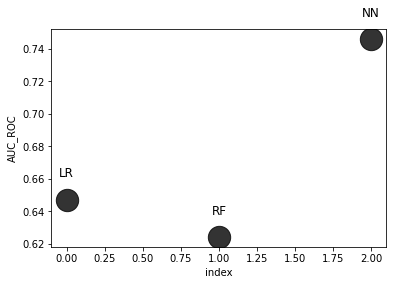

In [465]:
g = sns.regplot(data=model_summary, x="index", y="AUC_ROC", fit_reg=False,
                marker="o", color="black", scatter_kws={'s':500})

for i in range(0,model_summary.shape[0]):
     g.text(model_summary.loc[i,'index'], model_summary.loc[i,'AUC_ROC']+0.02, model_summary.loc[i,'Name'], 
            horizontalalignment='center', verticalalignment='top', size='large', color='black')

[0.2, 0.17894736842105263, 0.12631578947368421, 0.12631578947368421, 0.1368421052631579]


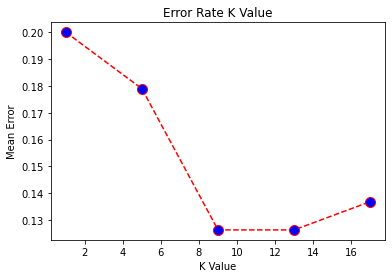

In [466]:
# # Calculate error for K values between 1 and 19 step 4
error = []

for i in range(1, 20, 4):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

print(error)
    
# Visulaize the relationship between error rate and k value
# plt.figure(figsize=(12, 6))
plt.plot(range(1, 20, 4), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [467]:
# Create an instance of KNeighborsClassifier as knc
knc = KNeighborsClassifier(n_neighbors=9)

# Fit the KNeighborsClassifier to the training data
knc.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data and
# store the predictions to a variable called pred
pred = knc.predict(X_test)

knc_score = knc.score(X_test, y_test)
print(knc_score)

0.8736842105263158


In [468]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[ 1 12]
 [ 0 82]]


In [529]:
# Make confusion matrix more visual
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=True,
                     cmap='GnBu')
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

Text(0.5, 1.0, 'K-Neighbors \n Accuracy 0.87\n')

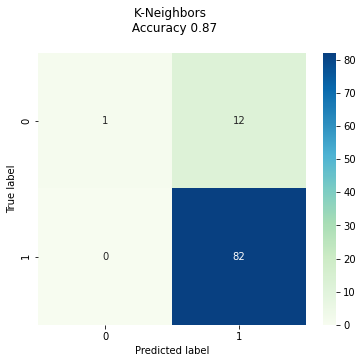

In [530]:
# Call plot_conf_mat with the test labels and predictions
plot_conf_mat(y_test, pred)


# Give the matrix a title
plt.title(f'K-Neighbors \n Accuracy {knc_score:.2f}\n')

In [551]:
# Fit the test labels and predictions into classification_report and
# print the report
print('K-Neighbors Report', end='\n\n\n')
print(classification_report(y_test,pred))

K-Neighbors Report


              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.87      1.00      0.93        82

    accuracy                           0.87        95
   macro avg       0.94      0.54      0.54        95
weighted avg       0.89      0.87      0.82        95



In [550]:
model_summary = pd.DataFrame(model_summary,columns=['Name', 'F1_score', 'Accuracy', 'AUC_ROC'])
model_summary = model_summary.reset_index()
print('Logistic Regression \nRandom Froest \nNeural Net \n\nReport', end='\n\n')
display(model_summary)

Logistic Regression 
Random Froest 
Neural Net 

Report



,index,Name,F1_score,Accuracy,AUC_ROC
0,0,LR,0.856572,0.884211,0.647280
1,1,RF,0.833226,0.842105,0.624296
2,2,NN,0.799762,0.863158,0.745779


# Feature Importance

In [538]:
eli5.show_weights(ML_models['LR'], feature_names = list(X_tst.columns), top=None)

Weight?,Feature
+1.754,<BIAS>
+0.759,followers
+0.378,num_interests
+0.229,Unknown
+0.191,Malaysia
+0.169,France
+0.145,China
+0.144,UK
+0.139,Mexico
+0.139,Vietnam


# Conclusion / Insight

### Participants with more followers and interests on DevPost are more likely to work in a team.

### Participants with more projects, likes and hackathon experience are more likely to work solo.